In [4]:
# Samuel Grant 2024
# Replicate Dave Brown's CompCRV.C in Python 

# External libraries 
import sys
import awkward as ak
import uproot
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
import numpy as np

# Internal libraries 
# import Utils as ut

In [151]:
# Import utilities notebooks
# Also need a common utils
%run CompCRVUtils.ipynb
%run PlotFitUtils.ipynb

In [6]:
# Input file
finName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00033/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000080.root"

In [7]:
# TrkAna tutorial:
# https://github.com/Mu2e/TrkAna/blob/main/tutorial

# We have event level, global coincidence level, global track level, and local track level
# Trying to mask the entire array based on, for example, a local track level mask, is tricky. 
# One approach is to split the array into the different levels/trees and mask the appropriate tree.

arrays = ak.Array([])
with uproot.open(finName+":TrkAnaExt/trkana") as tree: 
    arrays = tree.arrays(["evtinfo.", "crvcoincs", "crvcoincsmc", "kl", "klfit", "klkl"]) 

In [8]:
MarkCuts(arrays)


---> Marking cuts.
Done.


In [9]:
PrintNEvents(arrays, nEvents=1, showCutMasks=True)

evtinfo.runid: 1205
evtinfo.subrunid: 80
evtinfo.eventid: 134
crvcoincs.nLayers []
crvcoincs.angle: []
crvcoincs.sectorType: []
crvcoincs.pos.fCoordinates: ([], [], [])
crvcoincs.timeStart: []
crvcoincs.timeEnd: []
crvcoincs.time: []
crvcoincs.PEs: []
crvcoincs.nHits: []
crvcoincsmc.pdgId: []
kl.status: [1]
kl.nactive: [18]
kl.nhits: [18]
kl.nplanes: [4]
kl.nnullambig: [5]
kl.ndof: [31]
kl.fitcon: [0.00571]
klfit.sid: [[0, 2, 4, 4, 200, 200, 200]]
klfit.sindex: [[0, 0, 0, 0, 0, 1, 2]]
klfit.time: [[8.1e+04, 8.1e+04, 8.1e+04, 8.1e+04, 8.1e+04, 8.1e+04, 8.1e+04]]
klfit.pos.X() [[-1.84e+03, 1.9e+03, 11.3, -665, 1.86e+03, 1.94e+03, 2.01e+03]]
klfit.pos.Y() [[-2.93e+03, 4.71e+03, 850, -530, 4.62e+03, 4.78e+03, 4.92e+03]]
klfit.pos.Z() [[-1.63e+03, 1.64e+03, -12.7, -604, 1.6e+03, 1.67e+03, 1.73e+03]]
klkl.z0err: [[0.118, 0.153, 0.153, 0.118, 0.153, 0.153, 0.153]]
klkl.d0err: [[0.191, 0.214, 0.214, 0.191, 0.214, 0.214, 0.214]]
klkl.thetaerr: [[0.000267, 0.000275, 0.000275, 0.000267, 0.000275,

In [22]:
withCRV = ApplyCuts(arrays, ["goodCRV", "goodTrk", "CRV1", "KLCRV1", "bestFit"])
noCRV = ApplyCuts(arrays, ["noCRV", "goodTrk", "CRV1", "KLCRV1", "bestFit"])


---> Applying cuts  ['goodCRV', 'goodTrk', 'CRV1', 'KLCRV1', 'bestFit']

****************************
---> Reapplying goodTrk cut

---> Marking cuts.
Done.

---> Applying cuts  ['goodTrk']
Done.
****************************

Done.

---> Applying cuts  ['noCRV', 'goodTrk', 'CRV1', 'KLCRV1', 'bestFit']

****************************
---> Reapplying goodTrk cut

---> Marking cuts.
Done.

---> Applying cuts  ['goodTrk']
Done.
****************************

Done.


---> Written Images/h2_ZX.png


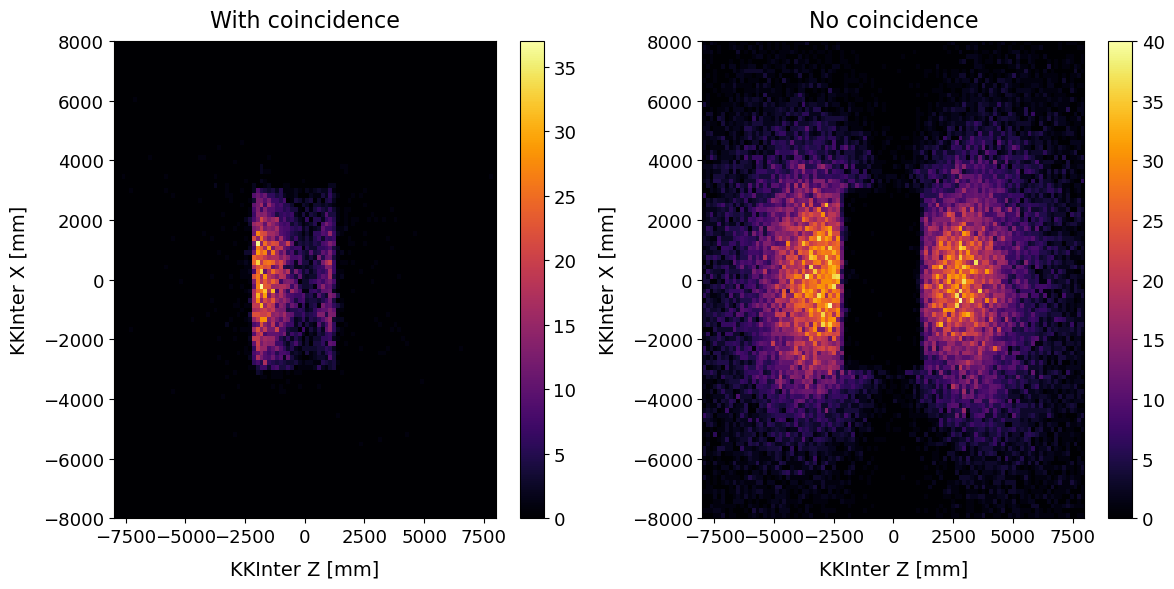

In [135]:
# XZ histograms
# Plot side-by-side
fig, ax = plt.subplots(1,2, figsize=(12, 6))

h2_ZX_withCRV = Hist2D(x=ak.flatten(withCRV["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
                       , y=ak.flatten(withCRV["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
                       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000) 
h2_ZX_noCRV = Hist2D(x=ak.flatten(noCRV["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
                     , y=ak.flatten(noCRV["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
                     , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000)

extent = [-8000, 8000, -8000, 8000]

im1 = ax[0].imshow(h2_ZX_withCRV.T, cmap="inferno", extent=extent, aspect="auto", origin="lower")
im2 = ax[1].imshow(h2_ZX_noCRV.T, cmap="inferno", extent=extent, aspect="auto", origin="lower")

cb0 = fig.colorbar(im1)
cb1 = fig.colorbar(im2)

# ScientificNotation(ax[0])
# ScientificNotation(ax[1])

ax[0].set_title("With coincidence", fontsize=16, pad=10)
ax[0].set_xlabel("KKInter Z [mm]", fontsize=14, labelpad=10)
ax[0].set_ylabel("KKInter X [mm]", fontsize=14, labelpad=10)

ax[1].set_title("No coincidence", fontsize=16, pad=10)
ax[1].set_xlabel("KKInter Z [mm]", fontsize=14, labelpad=10)
ax[1].set_ylabel("KKInter X [mm]", fontsize=14, labelpad=10)

# Set font size of tick labels on x and y axes
ax[0].tick_params(axis='both', labelsize=13) 
ax[1].tick_params(axis='both', labelsize=13)  
cb0.ax.tick_params(labelsize=13) 
cb1.ax.tick_params(labelsize=13)  

fig.tight_layout()
fig.show()

fout="Images/h2_ZX.png"
fig.savefig(fout, dpi=300, bbox_inches="tight")
print(f"---> Written {fout}")

In [23]:
# Sanity check
# ---> tcrvpg->GetEntries()	6614
# ---> tcrvpb->GetEntries()	47728
print(h2_ZX_withCRV.sum())
print(h2_ZX_noCRV.sum())
# I get slightly more entries, why? 
# 15% and 5% more... 
# Need to plot the invidual cuts. A job for a different notebook. 
# Is this within the range of the histogram?

7648.0
49670.0


In [143]:
# More plotting

# I have to ensure that we only have one CRV1 hit, or else the arrays are different lengths and cannot be subtracted. 
# I feel like ROOT just throws a warning when this happens... 

withSingleCRV1 = ApplyCuts(withCRV, ["singleCRV1"])

# Variables for plotting below
deltaT = ak.flatten(withSingleCRV1["klfit"]["time"], axis=None) - ak.flatten(withSingleCRV1["crvcoincs"]["crvcoincs.time"], axis=None)
trkX = ak.flatten(withSingleCRV1["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
trkZ = ak.flatten(withSingleCRV1["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
crvX = ak.flatten(withSingleCRV1["crvcoincs"]["crvcoincs.pos.fCoordinates.fX"], axis=None)
crvZ = ak.flatten(withSingleCRV1["crvcoincs"]["crvcoincs.pos.fCoordinates.fZ"], axis=None)


---> Applying cuts  ['singleCRV1']
Done.


---> Written Images/h1h2_deltaT.png


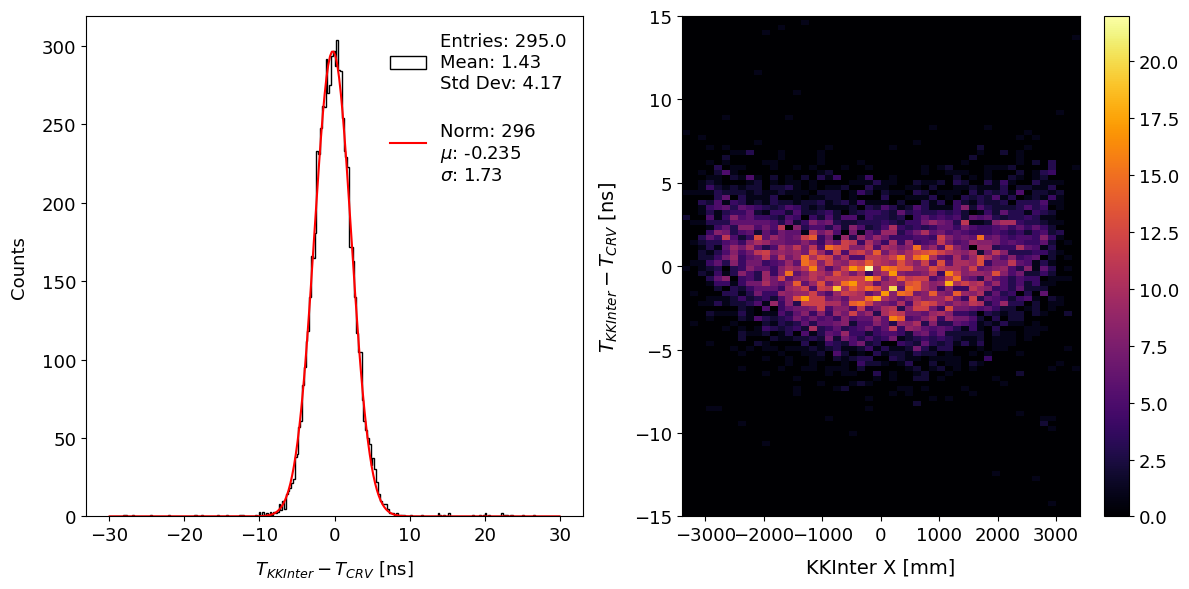

In [152]:
# deltaT histograms
# Plot side-by-side
fig, ax = plt.subplots(1,2, figsize=(12, 6))

#####################
# Plot left histogram
# Can also use
# Plot1DWithGausFit(deltaT, nbins=250, xmin=-30, xmax=30
#                   , norm=1.0, mu=0.0, sigma=3, fitMin=-30, fitMax=30
#                   , xlabel="$T_{KKInter} - T_{CRV}$ [ns]", ylabel="Counts", fout="Images/h1_deltaT.png")

nbins=250
xmin=-30
xmax=30
counts, binEdges, _ = ax[0].hist(deltaT, bins=250, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

##########################
# Construct & fit gaussian
#########################

# Calculate bin centers
binCentres = GetBinCentres(binEdges) 

# Filter bin_centres and counts based on fitMin and fitMax
fitMin=-30
fitMax=30
valid = (binCentres >= fitMin) & (binCentres <= fitMax)
binCentresFit = binCentres[valid]
countsFit = counts[valid]

# Fit the Gaussian function to the histogram data
params, covariance = curve_fit(GausFunc, binCentresFit, countsFit, p0=[300, 0, 3])
# Extract parameters from the fitting
norm, mu, sigma = params
# Plot the Gaussian curve
ax[0].plot(binCentresFit, GausFunc(binCentresFit, norm, mu, sigma), color="red")

# Calculate statistics
N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = GetBasicStats(counts, xmin, xmax)

# Create legend text
legendText = [f"Entries: {N}\nMean: {Round(mean, 3)}\nStd Dev: {Round(stdDev, 3)}", f"\nNorm: {Round(norm,3)}\n$\mu$: {Round(mu,3)}\n$\sigma$: {Round(sigma, 3)}"]

ax[0].legend(legendText, loc="best", frameon=False, fontsize=13)

# ax[0].set_title(title, fontsize=15, pad=10)
ax[0].set_xlabel("$T_{KKInter} - T_{CRV}$ [ns]", fontsize=13, labelpad=10) 
ax[0].set_ylabel("Counts", fontsize=13, labelpad=10) 

# Set font size of tick labels on x and y axes
ax[0].tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
ax[0].tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

# Scientific notation
ScientificNotation(ax[0]) 

#################
# Right histogram
h2_XdT = Hist2D(x=trkX, y=deltaT, nbinsX=50, xmin=-3400, xmax=3400, nbinsY=100, ymin=-15, ymax=15)

extent = [-3400, 3400, -15, 15]
im = ax[1].imshow(h2_XdT.T, cmap="inferno", extent=extent, aspect="auto", origin="lower")

cb = fig.colorbar(im)

ax[1].set_xlabel("KKInter X [mm]", fontsize=14, labelpad=10)
ax[1].set_ylabel("$T_{KKInter} - T_{CRV}$ [ns]", fontsize=14, labelpad=10)

# Set font size of tick labels on x and y axes
ax[1].tick_params(axis='both', labelsize=13)  
cb.ax.tick_params(labelsize=13) 
fig.tight_layout()
fig.show()

fout="Images/h1h2_deltaT.png"
fig.tight_layout()
fig.savefig(fout, dpi=300, bbox_inches="tight")
print(f"---> Written {fout}")

In [145]:
# Sanity check
# ---> tcrvts->GetEntries()	6614
# ---> dtvx->GetEntries()	6614
print(counts.sum())
print(h2_XdT.sum())
# I get slightly more entries, why? 
# 15% and 5% more... 
# Need to plot the invidual cuts. A job for a different notebook. 
# Is this within the range of the histogram?

7644.0
7592.0


---> Written Images/h2_XX_ZZ.png


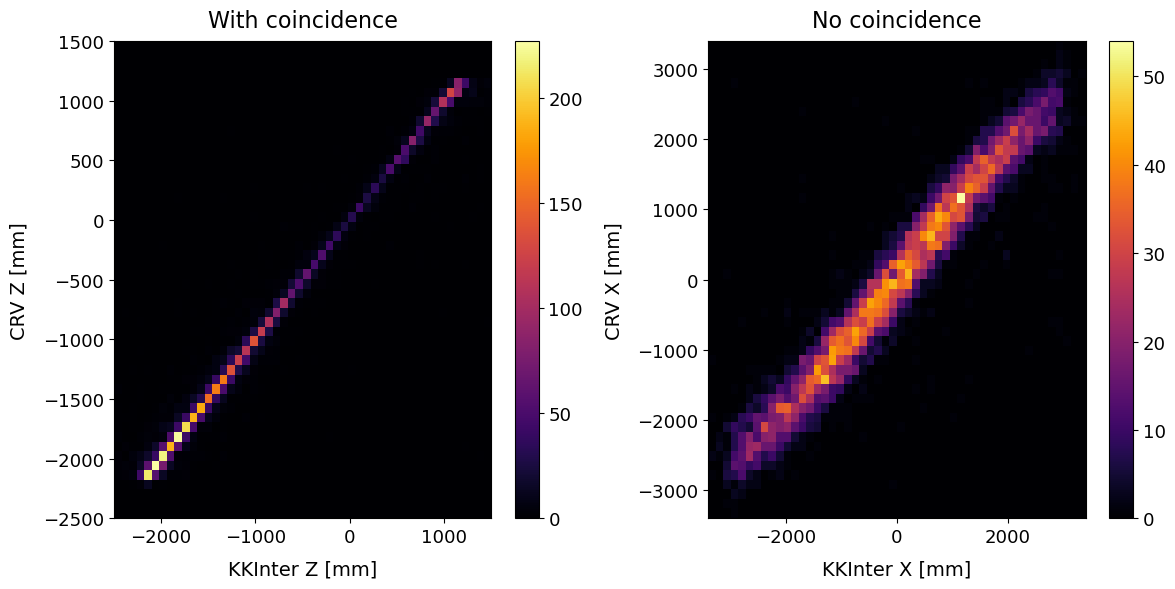

In [144]:
# XX and ZZ trk-crv histograms
fig, ax = plt.subplots(1,2, figsize=(12, 6))

h2_XX = Hist2D(x=trkZ, y=crvZ, nbinsX=50, xmin=-2500, xmax=1500, nbinsY=50, ymin=-2500, ymax=1500)
h2_ZZ = Hist2D(x=trkX, y=crvX, nbinsX=50, xmin=-3400, xmax=3400, nbinsY=50, ymin=-3400, ymax=3400)

im1 = ax[0].imshow(h2_XX.T, cmap="inferno", extent=[-2500, 1500, -2500, 1500], aspect="auto", origin="lower")
im2 = ax[1].imshow(h2_ZZ.T, cmap="inferno", extent=[-3400, 3400, -3400, 3400], aspect="auto", origin="lower")

cb0 = fig.colorbar(im1)
cb1 = fig.colorbar(im2)

# ScientificNotation(ax[0])
# ScientificNotation(ax[1])

ax[0].set_title("With coincidence", fontsize=16, pad=10)
ax[0].set_xlabel("KKInter Z [mm]", fontsize=14, labelpad=10)
ax[0].set_ylabel("CRV Z [mm]", fontsize=14, labelpad=10)

ax[1].set_title("No coincidence", fontsize=16, pad=10)
ax[1].set_xlabel("KKInter X [mm]", fontsize=14, labelpad=10)
ax[1].set_ylabel("CRV X [mm]", fontsize=14, labelpad=10)

# Set font size of tick labels on x and y axes
ax[0].tick_params(axis='both', labelsize=13) 
ax[1].tick_params(axis='both', labelsize=13)  
cb0.ax.tick_params(labelsize=13) 
cb1.ax.tick_params(labelsize=13)  

fig.tight_layout()
fig.show()

fout="Images/h2_XX_ZZ.png"
fig.savefig(fout, dpi=300, bbox_inches="tight")
print(f"---> Written {fout}")

In [146]:
# Sanity check
# ---> zvz->GetEntries()	6614
# ---> xvx->GetEntries()	6614
print(h2_XX.sum())
print(h2_ZZ.sum())

7519.0
7601.0
